### Módulo para generar los gráfos de relaciones

In [84]:
RELATIONS = ['and', 'suc 1', 'suc 2', 'successor', 'predecessor']
MAJOR = 'Computación 2013'

In [85]:
# Leer los majors desde el archivo
import json
import pandas as pd
import networkx as nx  
import matplotlib.pyplot as plt

with open('majors.json', 'r', encoding='utf-8') as json_majors:
    j = json_majors.read()
    majors = json.loads(j)

In [86]:
# Abrir el archivo json correspondiente al major
def open_relation_json(major):
    with open("data/{} - relations.json".format(major)) as json_relations:
        j = json_relations.read()
        return json.loads(j)

In [87]:
# auxiliar para truncar
import math
def trun(number, digits) -> float:
    stepper = 10.0 ** digits
    return math.trunc(stepper * number) / stepper

In [124]:
# Genera un grafo para cada relación, tomando en consideración solo los números significativos.
def create_graph(courses, relation_mat, rel, full_courses=[], show=False):
    if not full_courses:
        full_courses = courses[:]
    G=nx.DiGraph()
    weight = {}
    big=[]
    small=[]
    for course in courses:
        G.add_node(course)
    for course1 in courses:
        c1 = full_courses.index(course1)
        for course2 in courses:
            c2 = full_courses.index(course2)
            if course1 != course2:
                if relation_mat[rel][c1][c2] > 0:
                    weight[(course1, course2)] = trun(relation_mat[rel][c1][c2],4)
                    G.add_weighted_edges_from([(course1, course2, float(relation_mat[rel][c1][c2]))])
                    if relation_mat[rel][c1][c2] >= 0.7:
                        big.append((course2, course1))
                    else:
                        small.append((course2,course1))


    pos = nx.circular_layout(G)  # positions for all nodes
#   nodes
    nx.draw_networkx_nodes(G, pos, node_size=600)

#   edges
    nx.draw_networkx_edges(G, pos, width=2, edgelist=big, edge_color='g', arrows=True)
    nx.draw_networkx_edges(G, pos, edgelist=small, width=2, alpha=0.5, edge_color='r', style='dashed', arrows=True)
    nx.draw_networkx_edge_labels(G,pos,edge_labels=weight,font_size=7)

#   labels
    nx.draw_networkx_labels(G, pos, font_size=8, font_family='sans-serif')
    plt.axis('off')
    if show:
#         plt.savefig("{}.png".format(rel), bbox_inches="tight")
        plt.show()
    return G

Investigación Operativa
and


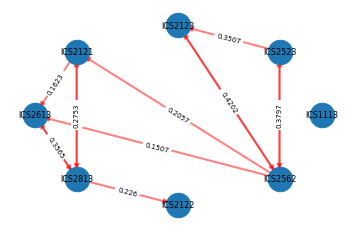

suc 1


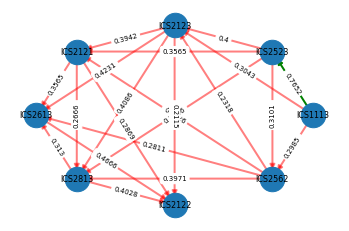

suc 2


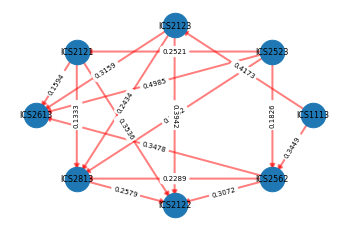

successor


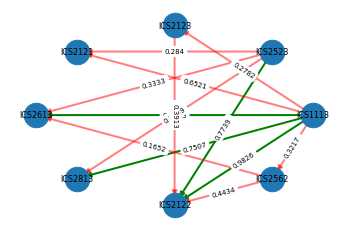

predecessor


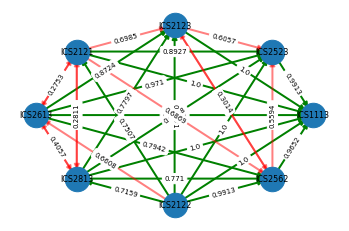

Computación 2013
and


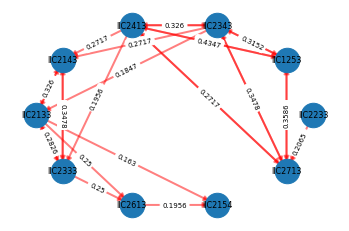

suc 1


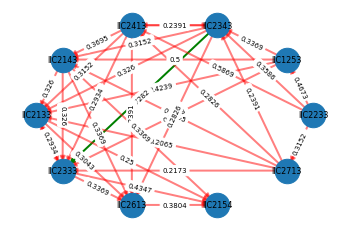

suc 2


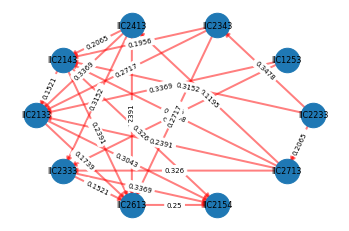

successor


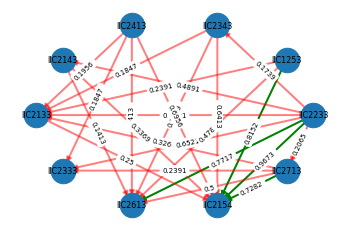

predecessor


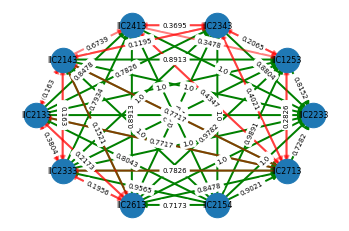

Computación T. Computación
and


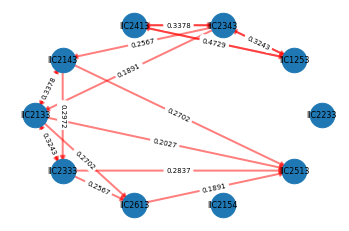

suc 1


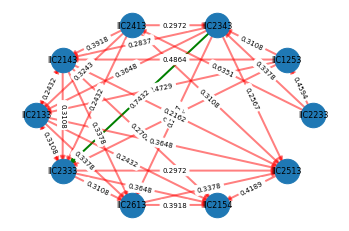

suc 2


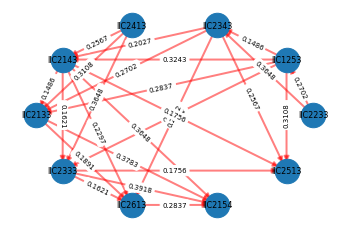

successor


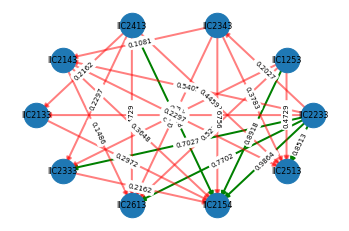

predecessor


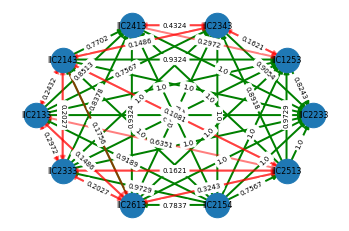

Computación T. Ing Software
and


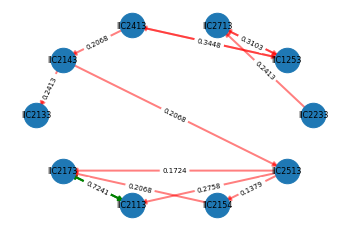

suc 1


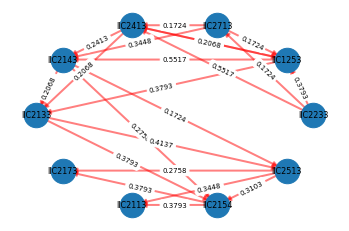

suc 2


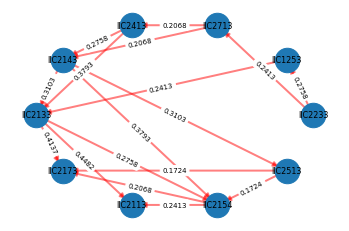

successor


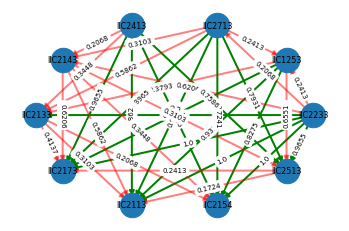

predecessor


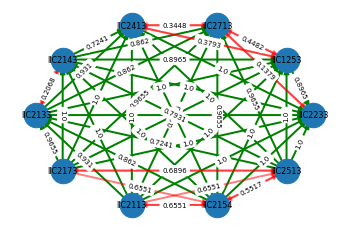

Computación comunes
and


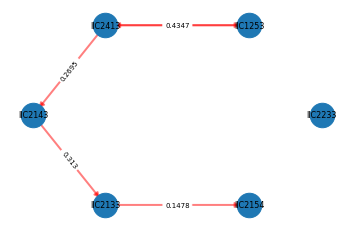

suc 1


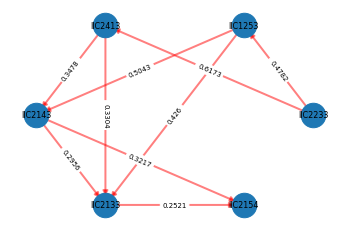

suc 2


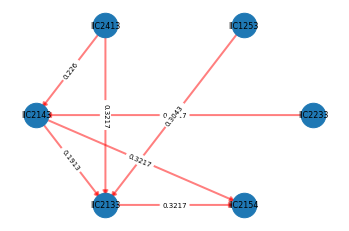

successor


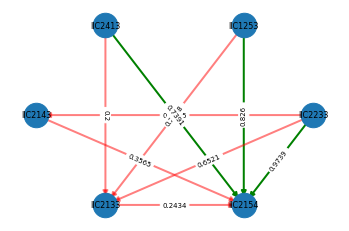

predecessor


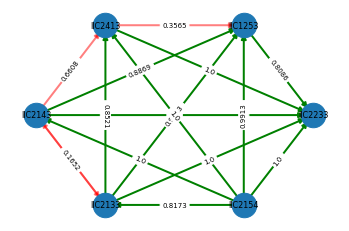

In [89]:
grafos = {}
for major in majors:
    rel_graph = []
    print(major)
    major_rel = open_relation_json(major)
    for r in RELATIONS:
        print(r)
        G = create_graph(majors[major], major_rel, r, show=True)
        rel_graph.append(G)
    grafos[major] = rel_graph

## Algoritmo en base al grafo:
1. Encontrar nodo de inicio (cabeza) y fin (cola). 
2. Guardarlas como 1 y N
3. volver a calcular grafos sin los nodos de borde
4. Volver al paso 1

Se genera un diccionario con el orden tentativo. Si existen dos o mas cursos en un nivel, se verifica si hay paralelismo.
Si no hay paralelismo entre todos, se verifica el orden a través de predecesión.
¿Si no hay un orden?

In [90]:
# Encontrar nodo de incio y fin
# out_degree = 0 para calcular head y in_degree = 0 para calcular tail
def get_head(grafo):
    return [x for x in grafo.nodes() if grafo.out_degree(x)==0]

def get_tail(grafo):
    return [x for x in grafo.nodes() if grafo.in_degree(x)==0]

In [104]:
def find_borders(courses, relation_values, rel):
    courses_copy = courses[:]
    courses_order = {}
    start = 1
    end = len(courses)
    last_iter = []
    while courses_copy:
        if last_iter == courses_copy:
            courses_order["{}".format(start)] = courses_copy
            break
        last_iter = courses_copy[:]
        graph = create_graph(courses_copy, relation_values, rel, full_courses=courses, show=True)
        head = get_head(graph)
#         print(head)
        if len(head) > 0:
            courses_order["{}".format(start)] = head
            for c in head:
                courses_copy.remove(c)
        tail = get_tail(graph)
#         print(tail)
        if len(tail) > 0 and courses_copy:
            courses_order["{}".format(end)] = tail
            for c in tail:
                courses_copy.remove(c)
        start += len(head)
        end -= len(tail)
    return courses_order

Investigación Operativa


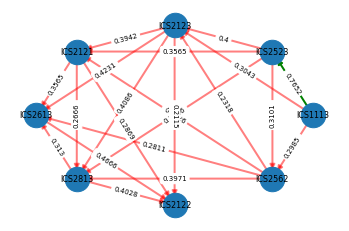

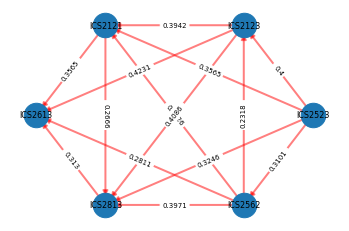

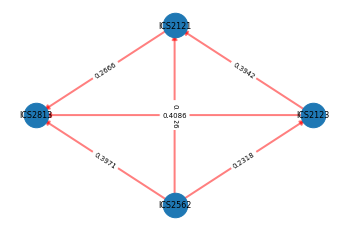

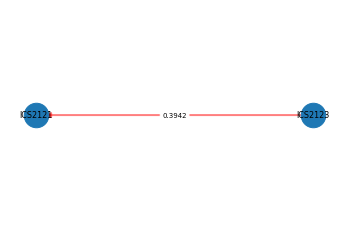

{'1': ['ICS1113'], '8': ['ICS2122'], '2': ['ICS2523'], '7': ['ICS2613'], '3': ['ICS2562'], '6': ['ICS2813'], '4': ['ICS2123'], '5': ['ICS2121']}
Computación 2013


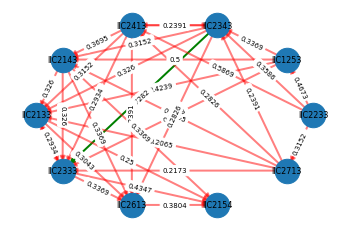

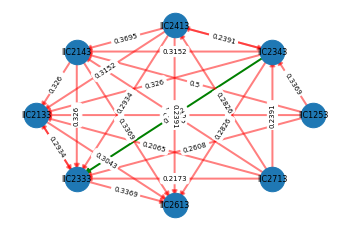

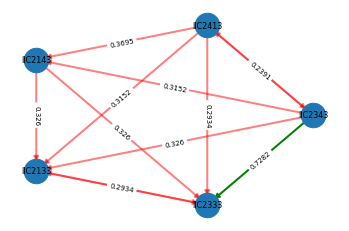

{'1': ['IIC2233'], '10': ['IIC2154'], '2': ['IIC1253', 'IIC2713'], '9': ['IIC2613'], '4': ['IIC2343', 'IIC2413', 'IIC2143', 'IIC2133', 'IIC2333']}
Computación T. Computación


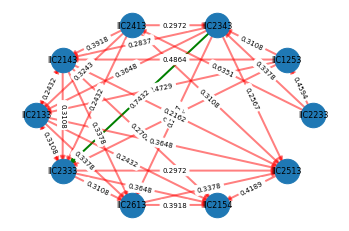

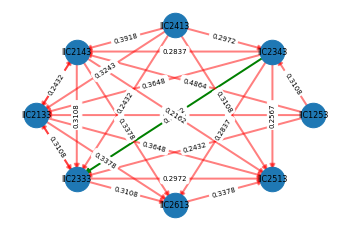

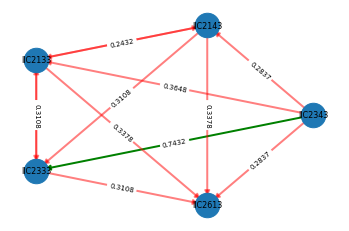

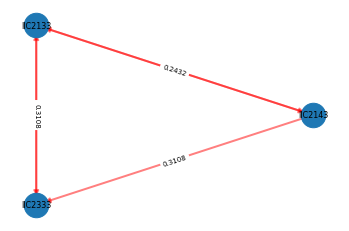

{'1': ['IIC2233'], '10': ['IIC2154'], '2': ['IIC1253', 'IIC2413'], '9': ['IIC2513'], '4': ['IIC2343'], '8': ['IIC2613'], '5': ['IIC2143', 'IIC2133', 'IIC2333']}
Computación T. Ing Software


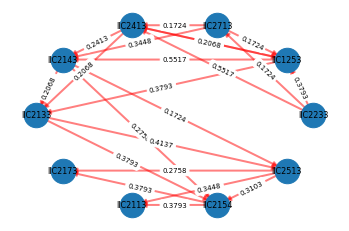

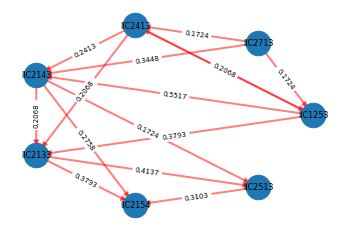

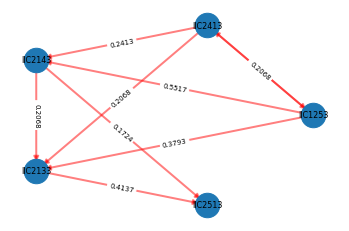

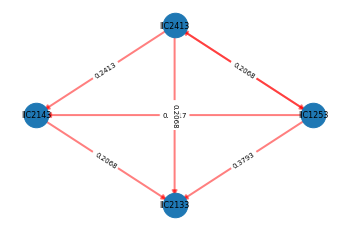

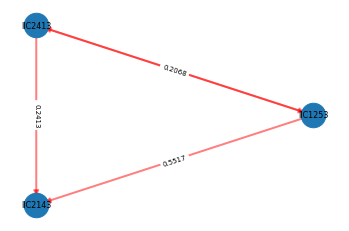

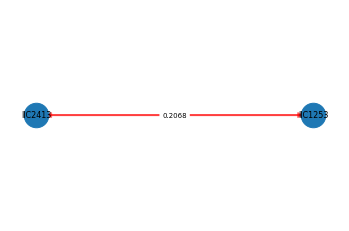

{'1': ['IIC2233'], '10': ['IIC2173', 'IIC2113'], '2': ['IIC2713'], '8': ['IIC2154'], '7': ['IIC2513'], '6': ['IIC2133'], '5': ['IIC2143'], '3': ['IIC1253', 'IIC2413']}
Computación comunes


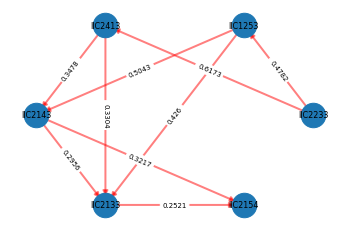

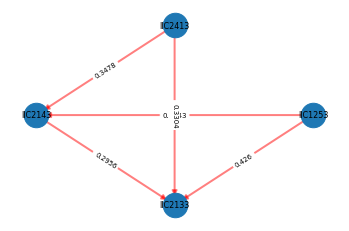

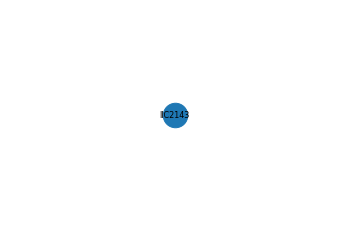

{'1': ['IIC2233'], '6': ['IIC2154'], '2': ['IIC1253', 'IIC2413'], '5': ['IIC2133'], '4': ['IIC2143']}


In [105]:
order = {}
for major in majors:
    print(major)
    co = find_borders(majors[major], open_relation_json(major), 'suc 1')
    print(co)
    order[major] = co

In [30]:
print(order)

{'Investigación Operativa': {'1': ['ICS1113'], '8': ['ICS2122'], '2': ['ICS2523'], '7': ['ICS2613'], '3': ['ICS2562'], '6': ['ICS2813'], '4': ['ICS2123'], '5': ['ICS2121']}, 'Computación 2013': {'1': ['IIC2233'], '10': ['IIC2154'], '2': ['IIC1253', 'IIC2713'], '9': ['IIC2613'], '4': ['IIC2343', 'IIC2413', 'IIC2143', 'IIC2133', 'IIC2333']}, 'Computación T. Computación': {'1': ['IIC2233'], '10': ['IIC2154'], '2': ['IIC1253', 'IIC2413'], '9': ['IIC2513'], '4': ['IIC2343'], '8': ['IIC2613'], '5': ['IIC2143', 'IIC2133', 'IIC2333']}, 'Computación T. Ing Software': {'1': ['IIC2233'], '10': ['IIC2173', 'IIC2113'], '2': ['IIC2713'], '8': ['IIC2154'], '7': ['IIC2513'], '6': ['IIC2133'], '5': ['IIC2143'], '3': ['IIC1253', 'IIC2413']}, 'Computación comunes': {'1': ['IIC2233'], '6': ['IIC2154'], '2': ['IIC1253', 'IIC2413'], '5': ['IIC2133'], '4': ['IIC2143']}}


In [93]:
# Verifica si un par de cursos es paralelo
def check_parallelism(c1, c2, full_courses, relation_values):
    c1 = full_courses.index(c1)
    c2 = full_courses.index(c2)
    # realizar comparacion entre predecesión (bilaterlal) y and
    v_and = relation_values['and'][c1][c2]
    v_pred1 = relation_values['predecessor'][c1][c2]
    v_pred2 = relation_values['predecessor'][c2][c1]
    if v_and >= (v_pred1-0.05) and v_and >= (v_pred2-0.05):
        return True
    else:
        return False

# Verificar si un curso es previo a otro.
def check_pred(c1, c2, full_courses, relation_values):
    c1 = full_courses.index(c1)
    c2 = full_courses.index(c2)
    v_pred1 = relation_values['predecessor'][c1][c2]
    v_pred2 = relation_values['predecessor'][c2][c1]
    if v_pred1 > v_pred2:
        return True
    else:
        return False

In [94]:
def check_multiple_parallelism(courses, full_courses, relation_values):
    for course1 in courses:
        c1 = full_courses.index(course1)
        for course2 in courses:
            c2 = full_courses.index(course2)
            if c1 != c2 and not check_parallelism(course1, course2, full_courses, relation_values): 
                return False
    return True

In [95]:
def check_1N_pred(c, courses, full_courses, relation_values):
    for course in courses:
        if not check_pred(c, course, full_courses, relation_values):
            return False
    return True

In [125]:
def order_list_courses(courses, full_courses, relation_values):
    if len(courses) == 1:
        return (True, courses)
    elif len(courses) >= 2:
        if check_multiple_parallelism(courses, full_courses, relation_values):
            return (True, courses)
        else:
            done = True
            orden = []
            c_copia = courses[:]
            while done:
                for i in range(len(c_copia)):
                    if check_1N_pred(c_copia[i], c_copia, full_courses, relation_values):
                        break
                    elif i == (len(c_copia) -1):
                        done = False
            c = [c_copia.pop(i)]
            orden.append(c_copia)
            orden.append(c)
            if len(c_copia) != len(courses):
                return (False, orden)
            else:
                return find_borders(courses, relation_values, 'predecessor')

In [126]:
def algorithm(course_order, full_courses, relation_values):
    new_order = {}
    for key in course_order:
        new_value = order_list_courses(course_order[key], full_courses, relation_values)
        if type(new_value) == dict:
            for nkey in new_value:
                k = int(nkey) + int(key) - 1
                new_order[k] = new_value[nkey]
        elif new_value[0]:
            new_order[key] = new_value[1]
        else:
            nkey = key
            for elem in new_value[1]:
                new_order[nkey] = elem
                nkey = str(int(nkey) + 1)
    return new_order

In [127]:
new_order = {}
for major in majors:
    print(major)
    co = algorithm(order[major], majors[major], open_relation_json(major))
    print(co)
    new_order[major] = co
# print(new_order)

Investigación Operativa
{'1': ['ICS1113'], '8': ['ICS2122'], '2': ['ICS2523'], '7': ['ICS2613'], '3': ['ICS2562'], '6': ['ICS2813'], '4': ['ICS2123'], '5': ['ICS2121']}
Computación 2013
{'1': ['IIC2233'], '10': ['IIC2154'], '2': ['IIC1253', 'IIC2713'], '9': ['IIC2613'], '4': ['IIC2343', 'IIC2413', 'IIC2143', 'IIC2133'], '5': ['IIC2333']}
Computación T. Computación
{'1': ['IIC2233'], '10': ['IIC2154'], '2': ['IIC1253', 'IIC2413'], '9': ['IIC2513'], '4': ['IIC2343'], '8': ['IIC2613'], '5': ['IIC2143', 'IIC2133'], '6': ['IIC2333']}
Computación T. Ing Software
{'1': ['IIC2233'], '10': ['IIC2173', 'IIC2113'], '2': ['IIC2713'], '8': ['IIC2154'], '7': ['IIC2513'], '6': ['IIC2133'], '5': ['IIC2143'], '3': ['IIC1253', 'IIC2413']}
Computación comunes
{'1': ['IIC2233'], '6': ['IIC2154'], '2': ['IIC1253', 'IIC2413'], '5': ['IIC2133'], '4': ['IIC2143']}


In [128]:
final = {}
for major in majors:
    final[major] = {}
    concurrent = False
    for k1 in new_order[major]:
        # comparar con el de la derecha
        if int(k1) < (len(new_order[major])-1):
            k2 = str(int(k1) + 1)
            while k2 not in new_order[major]:
                k2 = str(int(k2) + 1)
            c = new_order[major][k1] + new_order[major][k2]
            if check_multiple_parallelism(c, majors[major], open_relation_json(major)):
                final[major][k1] = c
                concurrent = True
            elif not concurrent:
                final[major][k1] = new_order[major][k1]
                concurrent = False
        elif not concurrent:
            final[major][k1] = new_order[major][k1]
    print(final[major])
# print(final)

{'1': ['ICS1113'], '8': ['ICS2122'], '2': ['ICS2523'], '7': ['ICS2613'], '3': ['ICS2562', 'ICS2123'], '6': ['ICS2813', 'ICS2613']}
{'1': ['IIC2233'], '10': ['IIC2154'], '2': ['IIC1253', 'IIC2713'], '9': ['IIC2613'], '4': ['IIC2343', 'IIC2413', 'IIC2143', 'IIC2133'], '5': ['IIC2333']}
{'1': ['IIC2233'], '10': ['IIC2154'], '2': ['IIC1253', 'IIC2413'], '9': ['IIC2513'], '4': ['IIC2343'], '8': ['IIC2613'], '5': ['IIC2143', 'IIC2133'], '6': ['IIC2333']}
{'1': ['IIC2233'], '10': ['IIC2173', 'IIC2113'], '2': ['IIC2713'], '8': ['IIC2154'], '7': ['IIC2513'], '6': ['IIC2133'], '5': ['IIC2143'], '3': ['IIC1253', 'IIC2413']}
{'1': ['IIC2233'], '6': ['IIC2154'], '2': ['IIC1253', 'IIC2413'], '5': ['IIC2133'], '4': ['IIC2143']}


2 3
2 4
2 5
3 2
3 4
3 5
4 2
4 3
4 5
5 2
5 3
5 4


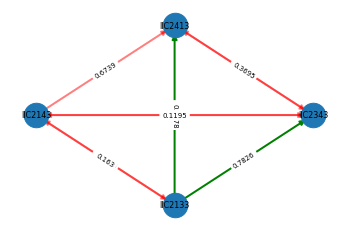

In [114]:
create_graph(['IIC2343', 'IIC2413', 'IIC2143', 'IIC2133'], open_relation_json('Computación 2013'), 'predecessor', majors['Computación 2013'], show=True)

In [129]:
for major in majors:
    print(major + '\n')
    count = 1
    for i in range(len(majors[major])+1):
        if str(i) in final[major]:
            print('S{}: {}'.format(count, final[major][str(i)]))
            count += 1

Investigación Operativa

S1: ['ICS1113']
S2: ['ICS2523']
S3: ['ICS2562', 'ICS2123']
S4: ['ICS2813', 'ICS2613']
S5: ['ICS2613']
S6: ['ICS2122']
Computación 2013

S1: ['IIC2233']
S2: ['IIC1253', 'IIC2713']
S3: ['IIC2343', 'IIC2413', 'IIC2143', 'IIC2133']
S4: ['IIC2333']
S5: ['IIC2613']
S6: ['IIC2154']
Computación T. Computación

S1: ['IIC2233']
S2: ['IIC1253', 'IIC2413']
S3: ['IIC2343']
S4: ['IIC2143', 'IIC2133']
S5: ['IIC2333']
S6: ['IIC2613']
S7: ['IIC2513']
S8: ['IIC2154']
Computación T. Ing Software

S1: ['IIC2233']
S2: ['IIC2713']
S3: ['IIC1253', 'IIC2413']
S4: ['IIC2143']
S5: ['IIC2133']
S6: ['IIC2513']
S7: ['IIC2154']
S8: ['IIC2173', 'IIC2113']
Computación comunes

S1: ['IIC2233']
S2: ['IIC1253', 'IIC2413']
S3: ['IIC2143']
S4: ['IIC2133']
S5: ['IIC2154']
